In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.26.4
2.0.3
0.12.2


In [3]:
# 데이터 불러오기 및 병합(2016년 ~ 2024년 2월)
# 기본적인 전처리(데이터 병합, 인덱스 초기화, 날짜 형식 변경)

df1 = pd.read_csv('data/전국수질측정자료_1997년_1999년_일자료.csv')
df1.drop('No', axis=1, inplace=True)

df2 = pd.read_csv('data/전국수질측정자료_2000년_2005년_일자료.csv')
df2.drop('No', axis=1, inplace=True)

df3 = pd.read_csv('data/전국수질측정자료_2006년_2010년_일자료.csv')
df3.drop('No', axis=1, inplace=True)

df4 = pd.read_csv('data/전국수질측정자료_2011년_2015년_일자료.csv')
df4.drop('No', axis=1, inplace=True)

df5 = pd.read_csv('data/전국수질측정자료_2016년_2021년_일자료.csv')
df5.drop('No', axis=1, inplace=True)

df6 = pd.read_csv('data/전국수질측정자료_2022년_일자료.csv')
df6.drop('No', axis=1, inplace=True)

df7 = pd.read_csv('data/전국수질측정자료_2023년_1~12월_일자료.csv')
df7.drop('No', axis=1, inplace=True)

df8 = pd.read_csv('data/전국수질측정자료_2024년_1~2월_일자료.csv').iloc[:1655,:]
df8.drop('No', axis=1, inplace=True)

df_water = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8], ignore_index=True)

# 잘못된 날짜 데이터 처리
df_water.loc[75809, 'collection date'] = '2007.10.31' # 1007.10.31
df_water.loc[80019, 'collection date'] = '2008.03.31' # ..
df_water.loc[80702, 'collection date'] = '2008.04.03' # ..
df_water['collection date'] = pd.to_datetime(df_water['collection date'], format='mixed', errors='raise')

df_water

,round,collection date,river,mid-range region,measuring station,depth,flow rate,BOD,Chlorophyll-a,COD,...,NO3-N,pH,phenols,PO4-P,SS,total coliform group,water temperature,T-N,TOC,T-P
0,1회차,1997-01-01,한강,섬강,섬강5,NaN,NaN,1.2,NaN,3.6,...,5.338,7.8,0.0,NaN,6.0,300.0,1.0,6.01,NaN,0.2
1,1회차,1997-01-03,낙동강,강정고령보(낙동왜관),달성,NaN,NaN,1.9,NaN,3.8,...,3.3,7.6,0.0,NaN,6.8,260.0,5.0,4.014,NaN,0.115
2,1회차,1997-01-03,낙동강,금호강,금호강8,NaN,NaN,8.4,NaN,16.6,...,9.88,7.9,0.0,NaN,10.9,140000.0,6.0,15.457,NaN,1.11
3,1회차,1997-01-03,낙동강,낙동밀양,삼랑진2,NaN,NaN,5.9,NaN,10.0,...,3.974,8.5,0.0,NaN,22.0,220.0,5.0,4.602,NaN,0.086
4,1회차,1997-01-03,낙동강,낙동밀양,하남,NaN,NaN,5.7,NaN,9.3,...,4.116,8.2,0.0,NaN,19.0,170.0,3.0,7.551,NaN,0.108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420601,1회차,2024-02-16,영산강,와탄천,와탄천,NaN,NaN,1.8,35.1,7.5,...,4.856,7.3,정량한계미만,0.167,12.0,31000.0,6.1,7.293,3.9,0.403
420602,1회차,2024-02-27,영산강,신안군,금산천,NaN,NaN,1.4,20.6,9.6,...,2.201,7.6,정량한계미만,0.008,8.4,1600.0,8.4,2.587,5.5,0.05
420603,1회차,2024-02-07,영산강,제주서해,옹포천,NaN,NaN,0.5,0.4,2.0,...,13.213,7.6,정량한계미만,0.062,1.6,4000.0,13.4,13.079,1.1,0.093
420604,1회차,2024-02-07,영산강,제주북해,외도천,NaN,NaN,0.1,0.5,0.5,...,2.789,7.7,정량한계미만,0.061,0.4,2700.0,13.9,2.715,0.4,0.074


In [4]:
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420606 entries, 0 to 420605
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   round                  420606 non-null  object        
 1   collection date        420606 non-null  datetime64[ns]
 2   river                  420606 non-null  object        
 3   mid-range region       420606 non-null  object        
 4   measuring station      420606 non-null  object        
 5   depth                  40617 non-null   float64       
 6   flow rate              136326 non-null  object        
 7   BOD                    410018 non-null  float64       
 8   Chlorophyll-a          261593 non-null  object        
 9   COD                    410008 non-null  float64       
 10  DO                     408989 non-null  float64       
 11  DTN                    264851 non-null  object        
 12  DTP                    265020 non-null  obje

In [5]:
# 결측치가 50% 이상인 variable 제거
df_water.drop('depth', axis=1, inplace=True)
df_water.drop('Fungal coliform group', axis=1, inplace=True)
df_water.drop('total coliform group', axis=1, inplace=True)
df_water.drop('round', axis=1, inplace=True)
df_water.drop('flow rate', axis=1, inplace=True)
df_water.drop('Chlorophyll-a', axis=1, inplace=True)
df_water.drop('DTN', axis=1, inplace=True)
df_water.drop('DTP', axis=1, inplace=True)
df_water.drop('NH3-N', axis=1, inplace=True)
df_water.drop('NO3-N', axis=1, inplace=True)
df_water.drop('phenols', axis=1, inplace=True)
df_water.drop('PO4-P', axis=1, inplace=True)

# '월곶'은 모든 데이터가 결측치라 제거
# 결측치가 너무 많은 지역: 월곶, 천미천
df_water.drop(df_water[df_water['measuring station'] == "월곶"].index, inplace=True)
df_water.drop(df_water[df_water['measuring station'] == "천미천"].index, inplace=True)
df_water.drop(df_water[df_water['measuring station'] == "형산강6"].index, inplace=True)

In [6]:
df_water.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420303 entries, 0 to 420605
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   collection date    420303 non-null  datetime64[ns]
 1   river              420303 non-null  object        
 2   mid-range region   420303 non-null  object        
 3   measuring station  420303 non-null  object        
 4   BOD                410018 non-null  float64       
 5   COD                410008 non-null  float64       
 6   DO                 408924 non-null  float64       
 7   EC                 408652 non-null  float64       
 8   pH                 410035 non-null  float64       
 9   SS                 410027 non-null  object        
 10  water temperature  409982 non-null  float64       
 11  T-N                409045 non-null  object        
 12  TOC                295416 non-null  object        
 13  T-P                409045 non-null  object       

In [7]:
# Dtype이 object인 columns의 값 확인
print(df_water['SS'].unique())
print(df_water['T-N'].unique())
print(df_water['TOC'].unique())
print(df_water['T-P'].unique())

[6.0 6.8 10.9 ... 366.0 144.8 151.7]
[6.01 4.014 15.457 ... 12.393 11.987 14.498]
[nan 3.8 2.6 3.4 3.3 6.8 1.2 3.6 0.8 1.7 1.0 4.5 2.2 0.7 1.3 4.6 2.3 4.1
 3.9 4.4 2.8 2.5 2.4 1.1 1.6 5.1 1.9 1.4 7.1 3.7 7.2 1.5 8.4 2.7 6.7 1.8
 7.7 4.2 3.2 4.9 2.0 2.1 4.8 0.6 2.9 4.0 4.3 6.3 8.8 5.5 3.1 3.0 0.0 8.1
 3.5 7.9 0.9 0.5 7.6 5.2 7.8 5.9 5.3 5.4 0.1 0.3 0.4 5.6 14.2 5.8 6.0 0.2
 5.0 8.7 7.5 7.0 18.4 6.1 7.3 4.7 5.7 21.2 6.4 6.6 10.5 6.2 9.5 13.6 7.4
 8.2 12.4 16.5 9.0 6.5 8.9 19.3 8.3 6.9 9.6 9.9 23.3 11.6 20.5 8.5 9.3
 18.9 10.0 8.6 15.6 13.2 14.0 9.7 10.9 8.0 9.8 9.1 14.4 17.1 9.4 11.9 10.7
 14.9 10.3 11.4 11.8 29.2 12.7 10.6 11.3 14.7 14.8 18.8 11.2 19.5 11.1
 12.1 17.4 10.4 10.2 15.9 9.2 18.2 12.3 14.6 17.6 26.2 22.3 35.0 23.5 16.4
 12.0 13.9 10.8 34.1 26.4 17.7 25.4 11.7 10.1 21.0 19.1 14.5 97.8 31.5
 11.0 26.0 17.9 22.6 11.5 18.1 16.7 19.0 13.1 17.2 15.0 13.8 17.3 12.2
 16.3 14.3 13.3 16.1 14.1 12.8 15.2 26.5 30.1 25.2 27.9 16.0 29.0 17.0
 21.3 28.9 31.3 12.5 25.6 23.2 30.9 19.7 28.0 2

In [8]:
# 데이터가 "정량한계미만"인 경우는 0으로 대체

df_water = df_water.replace({'TOC':'정량한계미만'}, 0)
df_water = df_water.replace({'SS':'정량한계미만'}, 0)
df_water = df_water.replace({'T-N':'정량한계미만'}, 0)
df_water = df_water.replace({'T-P':'정량한계미만'}, 0)

In [9]:
# 데이터 타입이 object인 변수들을 float으로 변경

df_water = df_water.astype({'SS':'float'})
df_water = df_water.astype({'T-N':'float'})
df_water = df_water.astype({'TOC':'float'})
df_water = df_water.astype({'T-P':'float'})

print(df_water.dtypes)

collection date      datetime64[ns]
river                        object
mid-range region             object
measuring station            object
BOD                         float64
COD                         float64
DO                          float64
EC                          float64
pH                          float64
SS                          float64
water temperature           float64
T-N                         float64
TOC                         float64
T-P                         float64
dtype: object


In [10]:
mod_df = df_water.loc[:,'measuring station':]

old_col = df_water.sort_values(by=['measuring station', 'collection date'])
old_col = old_col[['collection date', 'river', 'mid-range region']]
old_col = old_col.reset_index().drop('index', axis=1)

fill_mean_func = lambda g: g.fillna(g.mean())
mod_df = mod_df.groupby('measuring station').apply(fill_mean_func).reset_index()

mod_df[['collection date', 'river', 'mid-range region']] = old_col

mod_df = mod_df[['collection date', 'river',
       'mid-range region', 'measuring station', 'BOD', 'COD', 'DO',
       'EC', 'pH', 'SS', 'water temperature', 'T-N', 'TOC', 'T-P']]
df_water = mod_df


1. 그룹별 평균(groupby)를 사용하면 데이터의 순서가 바뀐다(그룹별로 모인다). 또한 groupby를 진행하기 위해 기준 변수(measuring station)을 제외한 나머지 object 변수(collection date, river, mid-range region)을 제거했기 때문에 기존 데이터에서 세 변수를 가져와 합칠 필요가 있다. 이때 순서가 바뀌면 안돼서 적절하게 데이터를 가져와야함!
2. 시계열 데이터라서 기존의 값으로 채우기(method='ffill')로 진행했으나 데이터가 처음부터 없는 경우도 있어서 결측치를 다 못채우는 경우가 많았다. 지금 아이디어는 ffill로 했을 때 결측치를 못채운 경우는 그만큼 결측치의 비율이 높으므로 제거도 고려해보는 것이 좋을 것 같다. 만약 변수가 제거하기에 아깝다면, 어쩔 수 없이 그룹별 평균으로 대체해야할 것 같다.
3. 아직 모델링을 진행하지는 않았지만, 변수의 수가 꽤 많은 것 같다. BOD를 기준으로 상관관계 분석이나 HeatMap을 그려보고 불필요한 변수를 제거하는 것이 좋을 것 같다. 주성분 분석(PCA, Principal Component Analysis)를 활용해서 차원 축소(변수를 줄이는 것 -> 복잡도 개선)를 해보는 것도 좋을 것 같다.

# 결측치 대체
df_water['flow rate'].fillna(0, inplace=True) # flow rate는 과반수가 0이라서 결측치를 0으로 대체
df_water['BOD'].fillna(0.8, inplace=True) # 상위 10개 변수의 평균으로 대체
df_water['Chlorophyll-a'].fillna(1.6, inplace=True) # 상위 10개 변수의 평균으로 대체
df_water['COD'].fillna(3.2, inplace=True) # 상위 10개 변수의 평균으로 대체
df_water['DO'].fillna(9.2, inplace=True) # 상위 10개 변수의 평균으로 대체
df_water['DTN'].fillna(2, inplace=True) # 상위 50개 확인했을 때 2 인근 값이 가장 많아서 2로 대체
df_water['DTP'].fillna(0.02, inplace=True) # 상위 50개 확인했을 때 0.02 인근 값이 가장 많아서 0.02로 대체
df_water['EC'].fillna(204.45, inplace=True) # 상위 50개 값의 평균값으로 대체
df_water['NH3-N'].fillna(0.3, inplace=True) # 상위 50개 확인했을 때 0.3 인근 값이 가장 많아서 0.3으로 대체
df_water['NO3-N'].fillna(1, inplace=True) # 상위 50개 확인했을 때 1 인근 값이 가장 많아서 1로 대체
df_water['pH'].fillna(8.2, inplace=True) # 상위 50개 값의 평균값으로 대체
df_water['phenols'].fillna(0, inplace=True) # 과반수가 0이라 0으로 대체
df_water['PO4-P'].fillna(0.02, inplace=True) # 상위 50개 확인했을 때 0.02 인근 값이 가장 많아서 0.02로 대체
df_water['SS'].fillna(3.2, inplace=True) # 상위 30개 값의 평균값으로 대체
df_water['water temperature'].fillna(23, inplace=True) # 상위 30개의 평균값으로 대체
df_water['T-N'].fillna(2.2, inplace=True) # 상위 60개의 평균값으로 대체
df_water['TOC'].fillna(2.5, inplace=True) # 상위 30개 확인했을 때 2.5 인근이 많아서 2.5로 대체
df_water['T-P'].fillna(0.025, inplace=True) # 상위 60개 확인했을 때 0.025 인근이 많아서 0.025로 대체

In [11]:
# BOD(산소 요구량)이 DO(산소량)보다 큰 경우(나쁜경우)
# BOD는 높을수록, DO는 낮을수록 좋다.
df_water[df_water['BOD']> df_water['DO']]

,collection date,river,mid-range region,measuring station,BOD,COD,DO,EC,pH,SS,water temperature,T-N,TOC,T-P
1984,1997-05-29,한강,한강고양,가양,7.5,10.5,6.2,370.0,7.8,21.4,19.0,9.460,2.676349,0.733
1988,1997-09-26,한강,한강고양,가양,4.0,6.3,3.5,275.0,7.7,19.2,28.0,5.205,2.676349,0.304
2130,2005-05-04,한강,한강고양,가양,5.7,7.4,5.3,235.0,6.8,8.6,17.0,4.585,2.676349,0.293
2131,2005-05-11,한강,한강고양,가양,5.0,7.0,4.5,220.0,6.8,5.7,17.0,8.395,2.676349,0.587
2200,2006-10-11,한강,한강고양,가양,8.8,4.7,5.0,294.0,7.4,39.3,22.0,5.939,2.676349,0.394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413967,1997-01-16,낙동강,수영강,회동댐상류,5.5,10.4,4.6,290.0,9.1,21.0,5.0,3.610,2.296610,0.216
415318,2017-02-07,낙동강,회야강,회야강2,8.8,14.3,6.6,644.0,7.6,9.5,8.1,3.070,5.600000,0.180
415325,2017-09-13,낙동강,회야강,회야강2,6.8,12.1,6.6,632.0,7.5,16.8,24.5,3.863,4.400000,0.206
415326,2017-10-11,낙동강,회야강,회야강2,4.8,9.3,1.9,823.0,7.1,6.2,22.8,4.585,4.600000,0.384


In [12]:
df_water.isna().sum()

collection date      0
river                0
mid-range region     0
measuring station    0
BOD                  0
COD                  0
DO                   0
EC                   0
pH                   0
SS                   0
water temperature    0
T-N                  0
TOC                  0
T-P                  0
dtype: int64

In [13]:
# BOD 기준으로 오염도 생성

pollution = []
for i in range(len(df_water)):
    if df_water['BOD'][i] <= 1:
        pollution.append(1)
    elif df_water['BOD'][i] <= 2:
        pollution.append(2)
    elif df_water['BOD'][i] <= 3:
        pollution.append(3)
    elif df_water['BOD'][i] <= 5:
        pollution.append(4)
    elif df_water['BOD'][i] <= 8:
        pollution.append(5)
    elif df_water['BOD'][i] <= 10:
        pollution.append(6)
    else:
        pollution.append(7)
df_water['pollution'] = pollution

In [14]:
# 월별 평균을 내기 위해 'year', 'month' 변수 생성

year = []
month = []

for i in range(len(df_water)):
    year.append(df_water['collection date'][i].year)
    month.append(df_water['collection date'][i].month)
    
df_water['year'] = year
df_water['month'] = month

In [15]:
df_water

,collection date,river,mid-range region,measuring station,BOD,COD,DO,EC,pH,SS,water temperature,T-N,TOC,T-P,pollution,year,month
0,1997-01-25,한강,충주댐,가곡,1.500000,2.300000,10.90000,215.000000,7.400000,2.000000,2.000000,5.045000,2.027857,0.010000,2,1997,1
1,1997-02-28,한강,충주댐,가곡,1.700000,2.100000,11.50000,210.000000,8.300000,3.000000,0.000000,4.864000,2.027857,0.024000,2,1997,2
2,1997-03-03,한강,충주댐,가곡,0.700000,2.100000,11.20000,210.000000,8.300000,1.500000,8.000000,3.374000,2.027857,0.029000,1,1997,3
3,1997-04-02,한강,충주댐,가곡,0.600000,2.200000,9.40000,180.000000,8.200000,2.500000,11.000000,4.333000,2.027857,0.007000,1,1997,4
4,1997-05-30,한강,충주댐,가곡,0.400000,2.400000,7.90000,230.000000,8.200000,4.000000,18.000000,2.861000,2.027857,0.027000,1,1997,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420298,2024-01-04,한강,남한강하류,흑천3,1.122589,3.210279,10.97868,148.668782,8.260025,7.249239,16.258376,2.563805,1.909663,0.035289,2,2024,1
420299,2024-01-08,한강,남한강하류,흑천3,1.122589,3.210279,10.97868,148.668782,8.260025,7.249239,16.258376,2.563805,1.909663,0.035289,2,2024,1
420300,2024-01-17,한강,남한강하류,흑천3,0.700000,1.800000,14.70000,158.000000,8.100000,0.400000,1.200000,3.257000,1.200000,0.013000,1,2024,1
420301,2024-01-22,한강,남한강하류,흑천3,1.122589,3.210279,10.97868,148.668782,8.260025,7.249239,16.258376,2.563805,1.909663,0.035289,2,2024,1


In [16]:
df_new = df_water.copy()
df_new = df_new.drop(['river', 'mid-range region'], axis=1) # 필요없는 문자열 데이터 제거

# 연도,월,측정 장소 별 평균으로 그룹화
df_clear = round(df_new.groupby(['year','month','measuring station']).mean(),2).reset_index()
# 측정일은 겹쳐서 제거하고, pollution은 제거 후 다시 구하기
df_clear.drop(['collection date', 'pollution'], axis=1, inplace=True)

# 월 및 장소 별 평균치에 대한 pollution
pollution = []
for i in range(len(df_clear)):
    if df_clear['BOD'][i] <= 1:
        pollution.append(1)
    elif df_clear['BOD'][i] <= 2:
        pollution.append(2)
    elif df_clear['BOD'][i] <= 3:
        pollution.append(3)
    elif df_clear['BOD'][i] <= 5:
        pollution.append(4)
    elif df_clear['BOD'][i] <= 8:
        pollution.append(5)
    elif df_clear['BOD'][i] <= 10:
        pollution.append(6)
    else:
        pollution.append(7)
df_clear['pollution'] = pollution

# time이라는 변수 생성(year과 month를 합침, 생성 후 두 변수 제거)
df_clear['time'] = df_clear['year'].astype(str) + '-' + df_clear['month'].astype(str)

# 컬럼 순서 변경(time을 앞으로 가져오기)
df_clear = df_clear[['time', 'year','month','measuring station', 'BOD', 'COD', 'DO',
    'EC', 'pH', 'SS',
       'water temperature', 'T-N', 'TOC', 'T-P', 'pollution']]
df_clear

,time,year,month,measuring station,BOD,COD,DO,EC,pH,SS,water temperature,T-N,TOC,T-P,pollution
0,1997-1,1997,1,가곡,1.50,2.30,10.90,215.00,7.4,2.00,2.00,5.04,2.03,0.01,2
1,1997-1,1997,1,가곡천,0.80,1.00,10.50,120.00,8.2,0.50,10.00,2.02,1.28,0.02,1
2,1997-1,1997,1,가대천,1.20,2.00,12.70,210.00,7.5,0.90,2.00,4.00,1.02,0.02,2
3,1997-1,1997,1,가야천,0.40,1.20,12.30,79.00,7.6,0.20,0.00,1.92,1.28,0.05,1
4,1997-1,1997,1,가양,4.90,7.30,11.00,392.00,8.0,10.30,5.00,5.88,2.68,0.90,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229558,2024-2,2024,2,탐진강3,1.10,2.90,11.50,114.00,7.6,0.70,7.20,0.70,2.20,0.02,2
229559,2024-2,2024,2,탐진강4,1.45,3.65,13.20,170.50,8.0,3.60,10.40,1.90,2.25,0.05,2
229560,2024-2,2024,2,탐진강5,1.38,4.53,12.15,164.75,7.4,12.05,8.32,1.96,2.80,0.07,2
229561,2024-2,2024,2,함평천1,1.70,4.00,13.00,220.00,7.7,4.40,4.00,2.53,3.00,0.04,2


In [17]:
df_clear.loc[:, "BOD":].corr()

,BOD,COD,DO,EC,pH,SS,water temperature,T-N,TOC,T-P,pollution
BOD,1.000000,0.795260,-0.181718,0.029308,-0.041537,0.182315,0.029207,0.509484,0.336913,0.628647,0.665392
COD,0.795260,1.000000,-0.223966,0.040736,-0.028937,0.273758,0.144099,0.491138,0.504498,0.612689,0.709848
DO,-0.181718,-0.223966,1.000000,-0.045673,0.212465,-0.120838,-0.636654,-0.083210,-0.151400,-0.195533,-0.170309
EC,0.029308,0.040736,-0.045673,1.000000,-0.010496,0.032742,-0.007180,0.015190,0.010120,0.035514,0.045927
pH,-0.041537,-0.028937,0.212465,-0.010496,1.000000,-0.036103,0.025824,-0.071811,-0.051005,-0.080920,-0.032962
SS,0.182315,0.273758,-0.120838,0.032742,-0.036103,1.000000,0.108560,0.084684,0.163668,0.162843,0.218225
water temperature,0.029207,0.144099,-0.636654,-0.007180,0.025824,0.108560,1.000000,-0.101959,0.125496,0.034026,0.090602
T-N,0.509484,0.491138,-0.083210,0.015190,-0.071811,0.084684,-0.101959,1.000000,0.255231,0.499020,0.460932
TOC,0.336913,0.504498,-0.151400,0.010120,-0.051005,0.163668,0.125496,0.255231,1.000000,0.246066,0.474906
T-P,0.628647,0.612689,-0.195533,0.035514,-0.080920,0.162843,0.034026,0.499020,0.246066,1.000000,0.466943


In [79]:
len(df_clear['measuring station'].unique())

959

In [19]:
length = []
for i in df_clear['measuring station'].unique():
               length.append(len(df_clear[df_clear['measuring station']=='{}'.format(i)]))

In [20]:
df_clear

,time,year,month,measuring station,BOD,COD,DO,EC,pH,SS,water temperature,T-N,TOC,T-P,pollution
0,1997-1,1997,1,가곡,1.50,2.30,10.90,215.00,7.4,2.00,2.00,5.04,2.03,0.01,2
1,1997-1,1997,1,가곡천,0.80,1.00,10.50,120.00,8.2,0.50,10.00,2.02,1.28,0.02,1
2,1997-1,1997,1,가대천,1.20,2.00,12.70,210.00,7.5,0.90,2.00,4.00,1.02,0.02,2
3,1997-1,1997,1,가야천,0.40,1.20,12.30,79.00,7.6,0.20,0.00,1.92,1.28,0.05,1
4,1997-1,1997,1,가양,4.90,7.30,11.00,392.00,8.0,10.30,5.00,5.88,2.68,0.90,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229558,2024-2,2024,2,탐진강3,1.10,2.90,11.50,114.00,7.6,0.70,7.20,0.70,2.20,0.02,2
229559,2024-2,2024,2,탐진강4,1.45,3.65,13.20,170.50,8.0,3.60,10.40,1.90,2.25,0.05,2
229560,2024-2,2024,2,탐진강5,1.38,4.53,12.15,164.75,7.4,12.05,8.32,1.96,2.80,0.07,2
229561,2024-2,2024,2,함평천1,1.70,4.00,13.00,220.00,7.7,4.40,4.00,2.53,3.00,0.04,2


In [21]:
df_muan = df_clear[df_clear['measuring station']=='무안2'].tail(12)
df_muan.to_excel(excel_writer='sample.xlsx') #엑셀로 저장

In [22]:
df_clear.loc[:,'BOD':]

,BOD,COD,DO,EC,pH,SS,water temperature,T-N,TOC,T-P,pollution
0,1.50,2.30,10.90,215.00,7.4,2.00,2.00,5.04,2.03,0.01,2
1,0.80,1.00,10.50,120.00,8.2,0.50,10.00,2.02,1.28,0.02,1
2,1.20,2.00,12.70,210.00,7.5,0.90,2.00,4.00,1.02,0.02,2
3,0.40,1.20,12.30,79.00,7.6,0.20,0.00,1.92,1.28,0.05,1
4,4.90,7.30,11.00,392.00,8.0,10.30,5.00,5.88,2.68,0.90,4
...,...,...,...,...,...,...,...,...,...,...,...
229558,1.10,2.90,11.50,114.00,7.6,0.70,7.20,0.70,2.20,0.02,2
229559,1.45,3.65,13.20,170.50,8.0,3.60,10.40,1.90,2.25,0.05,2
229560,1.38,4.53,12.15,164.75,7.4,12.05,8.32,1.96,2.80,0.07,2
229561,1.70,4.00,13.00,220.00,7.7,4.40,4.00,2.53,3.00,0.04,2


# min-max 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_clear.loc[:,'BOD':] = scaler.fit_transform(df_clear.loc[:,'BOD':])

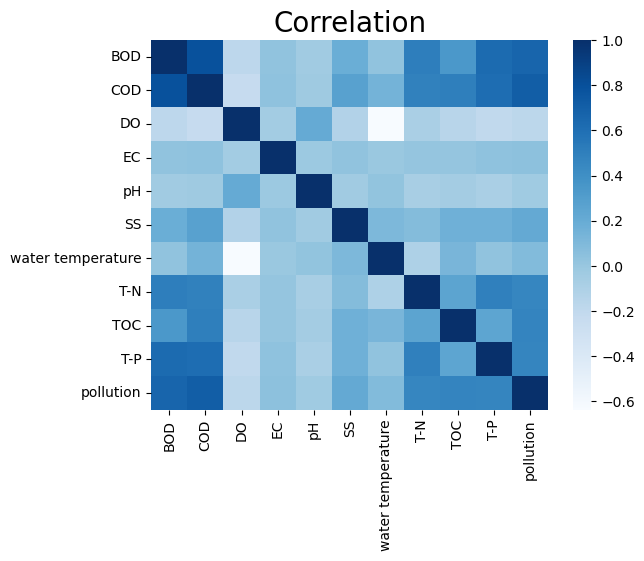

In [31]:
# heatmap by seaborn
ax = sns.heatmap(df_clear.loc[:,'BOD':].corr(), cmap='Blues')
plt.title('Correlation', fontsize=20)
plt.show()

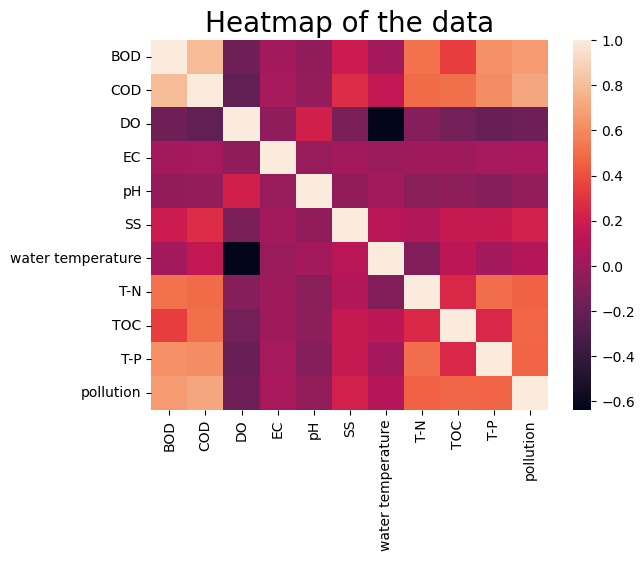

In [24]:
# heatmap by seaborn
ax = sns.heatmap(df_clear.loc[:,'BOD':].corr())
plt.title('Heatmap of the data', fontsize=20)
plt.show()

# BOD와 상관계수가 높은 변수 : COD, SS, T-N, TOC, T-P

In [26]:
len(sorted(df_clear['measuring station'].unique()))

959

In [33]:
# 주어진 input 별로 시간순 BOD 데이터프레임 생성
region = input('input the region: ')
df_ts = pd.DataFrame(df_clear[df_clear['measuring station'] == region][['BOD','T-P']])
df_ts.set_index(df_clear[df_clear['measuring station'] == region]['time'], inplace=True)
df_ts

input the region: 금천


,BOD,T-P
time,,
1997-1,3.60,0.07
1997-2,5.30,0.23
1997-3,5.10,0.18
1997-4,4.70,0.08
1997-5,5.70,0.05
...,...,...
2023-9,1.34,0.07
2023-10,1.31,0.06
2023-11,1.17,0.08


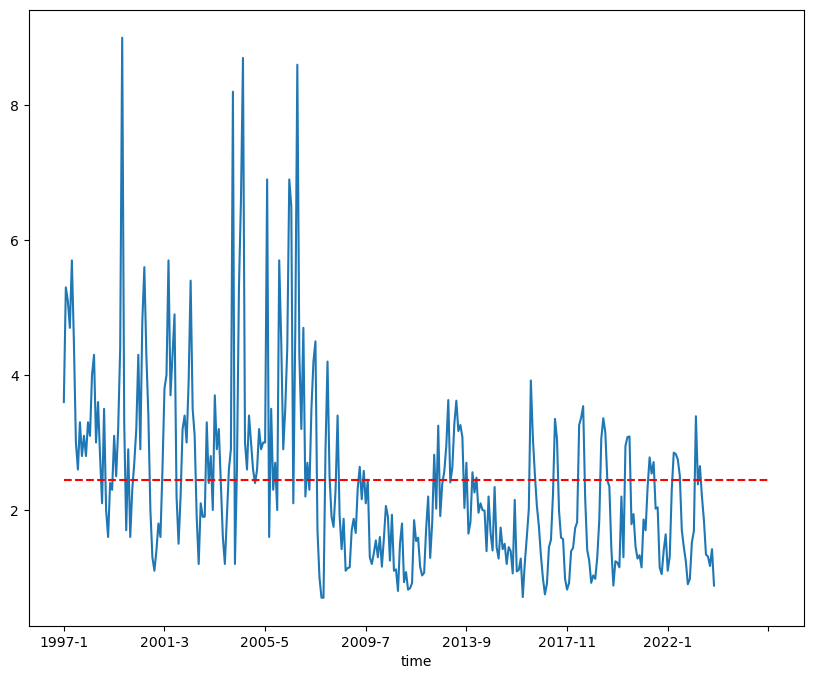

In [34]:
from statsmodels.tsa.stattools import adfuller, kpss
plt.figure(figsize=(10,8))
df_ts.BOD.plot(kind='line')
plt.hlines(y=df_ts.BOD.mean(), xmin=0, xmax=350, colors='red', linestyles='dashed')
plt.show()

In [35]:
def adf_test(timeseries, pvalue = .05, regression_option = 'ct'):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', regression = regression_option)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dfoutput[1] < pvalue:
       print(f"정상시계열이 아니라는 귀무가설을 {pvalue*100}%의 유의수준으로 기각할 수 있으므로 해당 데이터는 정상성이 보장됩니다.")
    else:
       print(f"정상시계열이 아니라는 귀무가설을 {pvalue*100}%의 유의수준으로 기각할 수 없으므로 해당 데이터는 정상성을 보장하지 못합니다.")


adf_test(df_ts['BOD'])

Results of Dickey-Fuller Test:
Test Statistic                  -3.831613
p-value                          0.015027
Lags Used                       16.000000
Number of Observations Used    307.000000
Critical Value (1%)             -3.988565
Critical Value (5%)             -3.424888
Critical Value (10%)            -3.135515
dtype: float64
정상시계열이 아니라는 귀무가설을 5.0%의 유의수준으로 기각할 수 있으므로 해당 데이터는 정상성이 보장됩니다.


In [36]:
def kpss_test(timeseries, pvalue = .05, regression_option = 'ct'):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression= regression_option)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    if kpss_output[1] < pvalue:
        print(f"정상시계열이 맞다는 귀무가설을 {pvalue*100}%의 유의수준으로 기각할 수 있으므로 해당 데이터는 정상성을 보장하지 못합니다.")
    else:
        print(f"정상시계열이 맞다는 귀무가설을 {pvalue*100}%의 유의수준으로 기각할 수 없으므로 해당 데이터는 정상성이 보장됩니다.")
        

kpss_test(df_ts['BOD'])

Results of KPSS Test:
Test Statistic           0.139432
p-value                  0.062163
Lags Used                8.000000
Critical Value (10%)     0.119000
Critical Value (5%)      0.146000
Critical Value (2.5%)    0.176000
Critical Value (1%)      0.216000
dtype: float64
정상시계열이 맞다는 귀무가설을 5.0%의 유의수준으로 기각할 수 없으므로 해당 데이터는 정상성이 보장됩니다.


In [37]:
BOD = df_ts["BOD"].to_frame(name="BOD") # 데이터의 행을 역순으로 뒤집는 부분 
BOD = BOD.loc[::-1]
BOD["lag_1"] = BOD["BOD"].shift(periods=1)

In [38]:
BOD['직접 구한 diff_1'] = BOD['BOD'] - BOD['lag_1'] 
BOD['함수로 구한 diff_1'] = BOD['BOD'].diff(1) 
print(BOD)

          BOD  lag_1  직접 구한 diff_1  함수로 구한 diff_1
time                                             
2024-1   0.88    NaN           NaN            NaN
2023-12  1.42   0.88          0.54           0.54
2023-11  1.17   1.42         -0.25          -0.25
2023-10  1.31   1.17          0.14           0.14
2023-9   1.34   1.31          0.03           0.03
...       ...    ...           ...            ...
1997-5   5.70   4.50          1.20           1.20
1997-4   4.70   5.70         -1.00          -1.00
1997-3   5.10   4.70          0.40           0.40
1997-2   5.30   5.10          0.20           0.20
1997-1   3.60   5.30         -1.70          -1.70

[324 rows x 4 columns]


In [39]:
# 앞서 1차 차분에서 진행했던 값의 컬럼을 변경해주고 drop한다
BOD["diff_1"] = BOD["함수로 구한 diff_1"]
BOD = BOD.drop(columns=['함수로 구한 diff_1', '직접 구한 diff_1'])

# 2차 차분을 시행하기 위해 1차 차분 값을 lag=1 적용하여 미뤄준다
BOD['diff_1 + lag_1'] = BOD['diff_1'].shift(1)

# 2차 차분값 도출
BOD['diff_1 + lag_1'] = BOD['diff_1'].shift(1)
BOD['직접 구한 diff_2'] = BOD['diff_1'] - BOD['diff_1 + lag_1']
BOD['함수로 구한 diff_2'] = BOD['BOD'].diff().diff()

print(BOD)

          BOD  lag_1  diff_1  diff_1 + lag_1  직접 구한 diff_2  함수로 구한 diff_2
time                                                                     
2024-1   0.88    NaN     NaN             NaN           NaN            NaN
2023-12  1.42   0.88    0.54             NaN           NaN            NaN
2023-11  1.17   1.42   -0.25            0.54         -0.79          -0.79
2023-10  1.31   1.17    0.14           -0.25          0.39           0.39
2023-9   1.34   1.31    0.03            0.14         -0.11          -0.11
...       ...    ...     ...             ...           ...            ...
1997-5   5.70   4.50    1.20            1.50         -0.30          -0.30
1997-4   4.70   5.70   -1.00            1.20         -2.20          -2.20
1997-3   5.10   4.70    0.40           -1.00          1.40           1.40
1997-2   5.30   5.10    0.20            0.40         -0.20          -0.20
1997-1   3.60   5.30   -1.70            0.20         -1.90          -1.90

[324 rows x 6 columns]


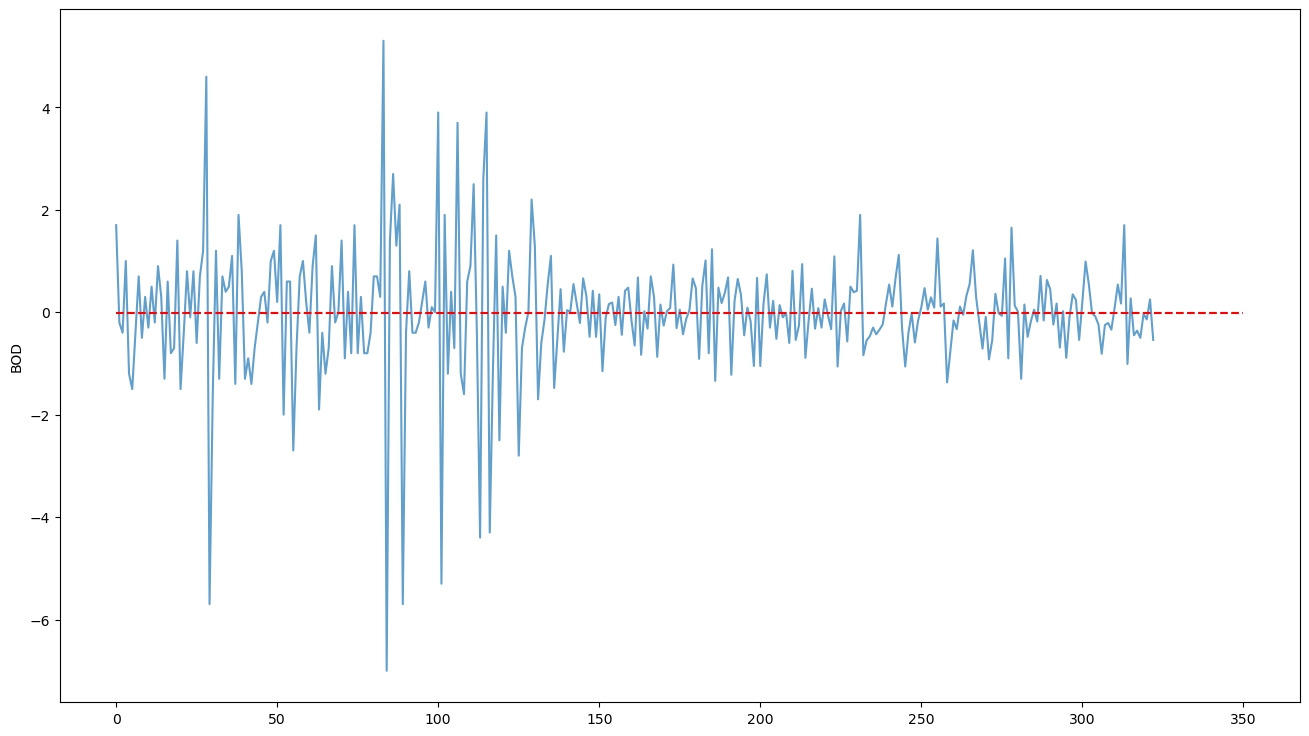

In [40]:
diff_data = df_ts['BOD'].diff(1).dropna()

# 표 그리기
plt.figure(figsize=(16,9))
plt.plot(diff_data.values, alpha=.7)
plt.hlines(y=diff_data.mean(), xmin=0, xmax=350, colors='red', linestyles='dashed')
plt.ylabel('BOD')
plt.show()

In [41]:
adf_test(diff_data)

Results of Dickey-Fuller Test:
Test Statistic                  -5.544159
p-value                          0.000019
Lags Used                       14.000000
Number of Observations Used    308.000000
Critical Value (1%)             -3.988467
Critical Value (5%)             -3.424841
Critical Value (10%)            -3.135487
dtype: float64
정상시계열이 아니라는 귀무가설을 5.0%의 유의수준으로 기각할 수 있으므로 해당 데이터는 정상성이 보장됩니다.


In [42]:
kpss_test(diff_data)

Results of KPSS Test:
Test Statistic            0.054733
p-value                   0.100000
Lags Used                23.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64
정상시계열이 맞다는 귀무가설을 5.0%의 유의수준으로 기각할 수 없으므로 해당 데이터는 정상성이 보장됩니다.


/var/folders/cp/qzwwc5t13h99bvx4pbylssnw0000gn/T/ipykernel_19149/2464408786.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression= regression_option)


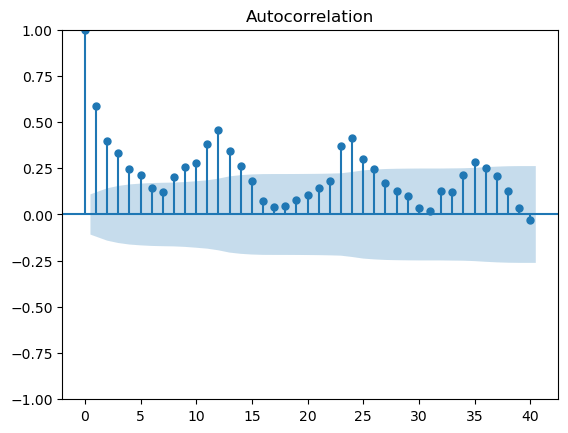

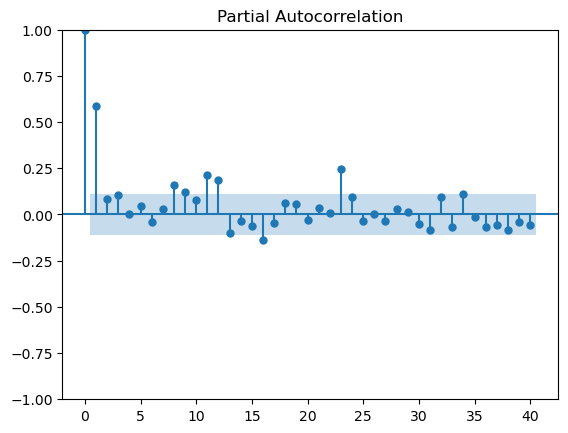

In [43]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF 플롯
plot_acf(df_ts['BOD'], lags=40)
plt.show() # p=1

# PACF 플롯
plot_pacf(df_ts['BOD'], lags=40)
plt.show() # q=1

# ARIMA modeling

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=868.668, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=928.391, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=812.776, Time=0.27 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=839.311, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1301.716, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=831.808, Time=0.05 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=806.165, Time=0.76 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=807.817, Time=1.02 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=806.381, Time=0.21 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=868.118, Time=0.36 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=804.738, Time=0.72 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=812.647, Time=0.16 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=806.139, Time=0.79 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=804.630, Time=0.25 sec
 ARIMA(2,0,0)(0,0,1)[12] interce

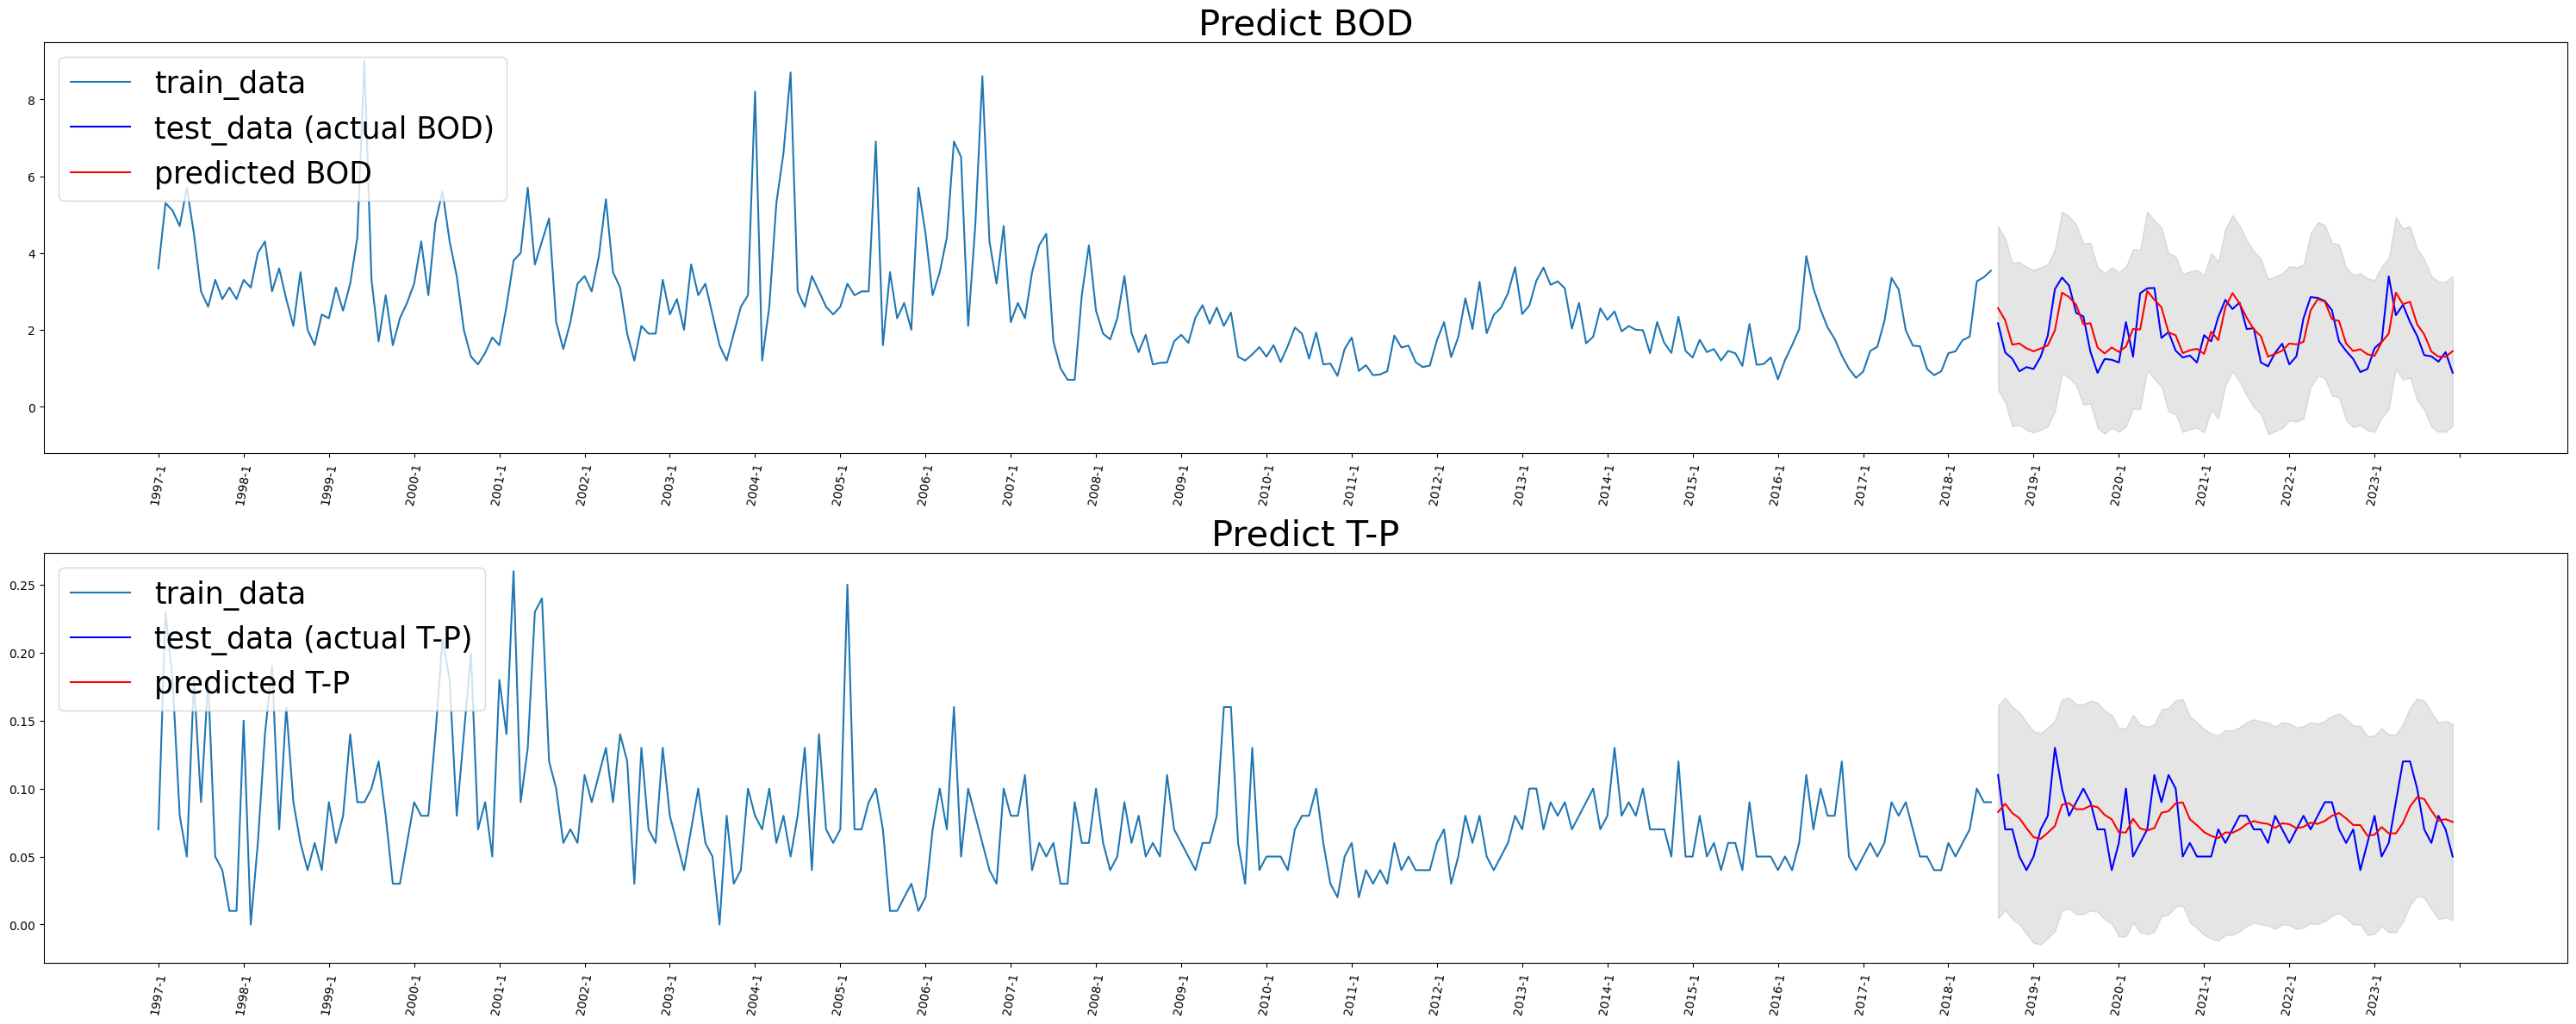

In [44]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from pmdarima.arima import ndiffs
import pmdarima as pm

# 데이터를 분리

data_BOD = df_ts['BOD']
data_TP = df_ts['T-P']

n_diffs_BOD = ndiffs(data_BOD, alpha=0.05, test='adf', max_d=6)
n_diffs_TP = ndiffs(data_TP, alpha=0.05, test='adf', max_d=6)

# train : test = 8 : 2
train_data_BOD, test_data_BOD = df_ts["BOD"][:int(len(df_ts)*0.8)], df_ts["BOD"][int(len(df_ts)*0.8):]
train_data_TP, test_data_TP = df_ts["T-P"][:int(len(df_ts)*0.8)], df_ts["T-P"][int(len(df_ts)*0.8):]

model_fit_BOD = pm.auto_arima(
    	    y=train_data_BOD, 
 	        d=n_diffs_BOD , 
            start_p=0, max_p=3, 
            start_q=0, max_q=3, 
            m=12, seasonal=True,
            stepwise=True,
            trace=True
)

model_fit_TP = pm.auto_arima(
    	    y=train_data_TP, 
 	        d=n_diffs_TP , 
            start_p=0, max_p=3, 
            start_q=0, max_q=3, 
            m=12, seasonal=True,
            stepwise=True,
            trace=True
)
# forecast 함수
def forecast_n_step(model, n=1):
    fc, conf_int = model.predict(n_periods=n, return_conf_int=True)
    # print("fc", fc,"conf_int", conf_int)
    return (
        fc.tolist()[0:n], np.asarray(conf_int).tolist()[0:n]
   )
    
def forecast(len, model, index, data=None):
    y_pred = []
    pred_upper = []
    pred_lower = []

    if data is not None:
        for new_ob in data:
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(new_ob)
    else:
        for i in range(len):
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(fc[0])
    return pd.Series(y_pred, index=index), pred_upper, pred_lower

# Forecast
fc_BOD, upper_BOD, lower_BOD = forecast(len(test_data_BOD), model_fit_BOD, test_data_BOD.index, data = test_data_BOD)
fc_TP, upper_TP, lower_TP = forecast(len(test_data_TP), model_fit_TP, test_data_TP.index, data = test_data_TP)


# fc # 예측결과
# pandas series 생성
fc_series_BOD = pd.Series(fc_BOD, index=test_data_BOD.index)
lower_series_BOD = pd.Series(lower_BOD, index=test_data_BOD.index)
upper_series_BOD = pd.Series(upper_BOD, index=test_data_BOD.index)

fc_series_TP = pd.Series(fc_TP, index=test_data_TP.index)
lower_series_TP = pd.Series(lower_TP, index=test_data_TP.index)
upper_series_TP = pd.Series(upper_TP, index=test_data_TP.index)


# Plot
plt.figure(figsize=(30,12))

total_len = len(train_data_BOD)+len(test_data_BOD)

plt.subplot(2,1,1)
plt.plot(train_data_BOD, label='train_data')
plt.plot(test_data_BOD, c='b', label='test_data (actual BOD)')
plt.plot(fc_BOD, c='r',label='predicted BOD')
plt.fill_between(lower_series_BOD.index, lower_series_BOD, upper_series_BOD, color='k', alpha=.10)
plt.legend(loc='upper left', fontsize=25)
plt.xticks(rotation=80)
plt.xticks(np.arange(0, total_len +1, 12))
plt.title("Predict BOD", fontsize=30)

plt.subplot(2,1,2)
plt.plot(train_data_TP, label='train_data')
plt.plot(test_data_TP, c='b', label='test_data (actual T-P)')
plt.plot(fc_TP, c='r',label='predicted T-P')
plt.fill_between(lower_series_TP.index, lower_series_TP, upper_series_TP, color='k', alpha=.10)
plt.legend(loc='upper left', fontsize=25)
plt.xticks(rotation=80)
plt.xticks(np.arange(0, total_len +1, 12))
plt.title("Predict T-P", fontsize=30)

plt.tight_layout()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=868.668, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=928.391, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=812.776, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=839.311, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1301.716, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=831.808, Time=0.05 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=806.165, Time=0.33 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=807.817, Time=0.70 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=806.381, Time=0.31 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=868.118, Time=0.24 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=804.738, Time=0.48 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=812.647, Time=0.14 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=806.139, Time=1.11 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=804.630, Time=0.54 sec
 ARIMA(2,0,0)(0,0,1)[12] interce

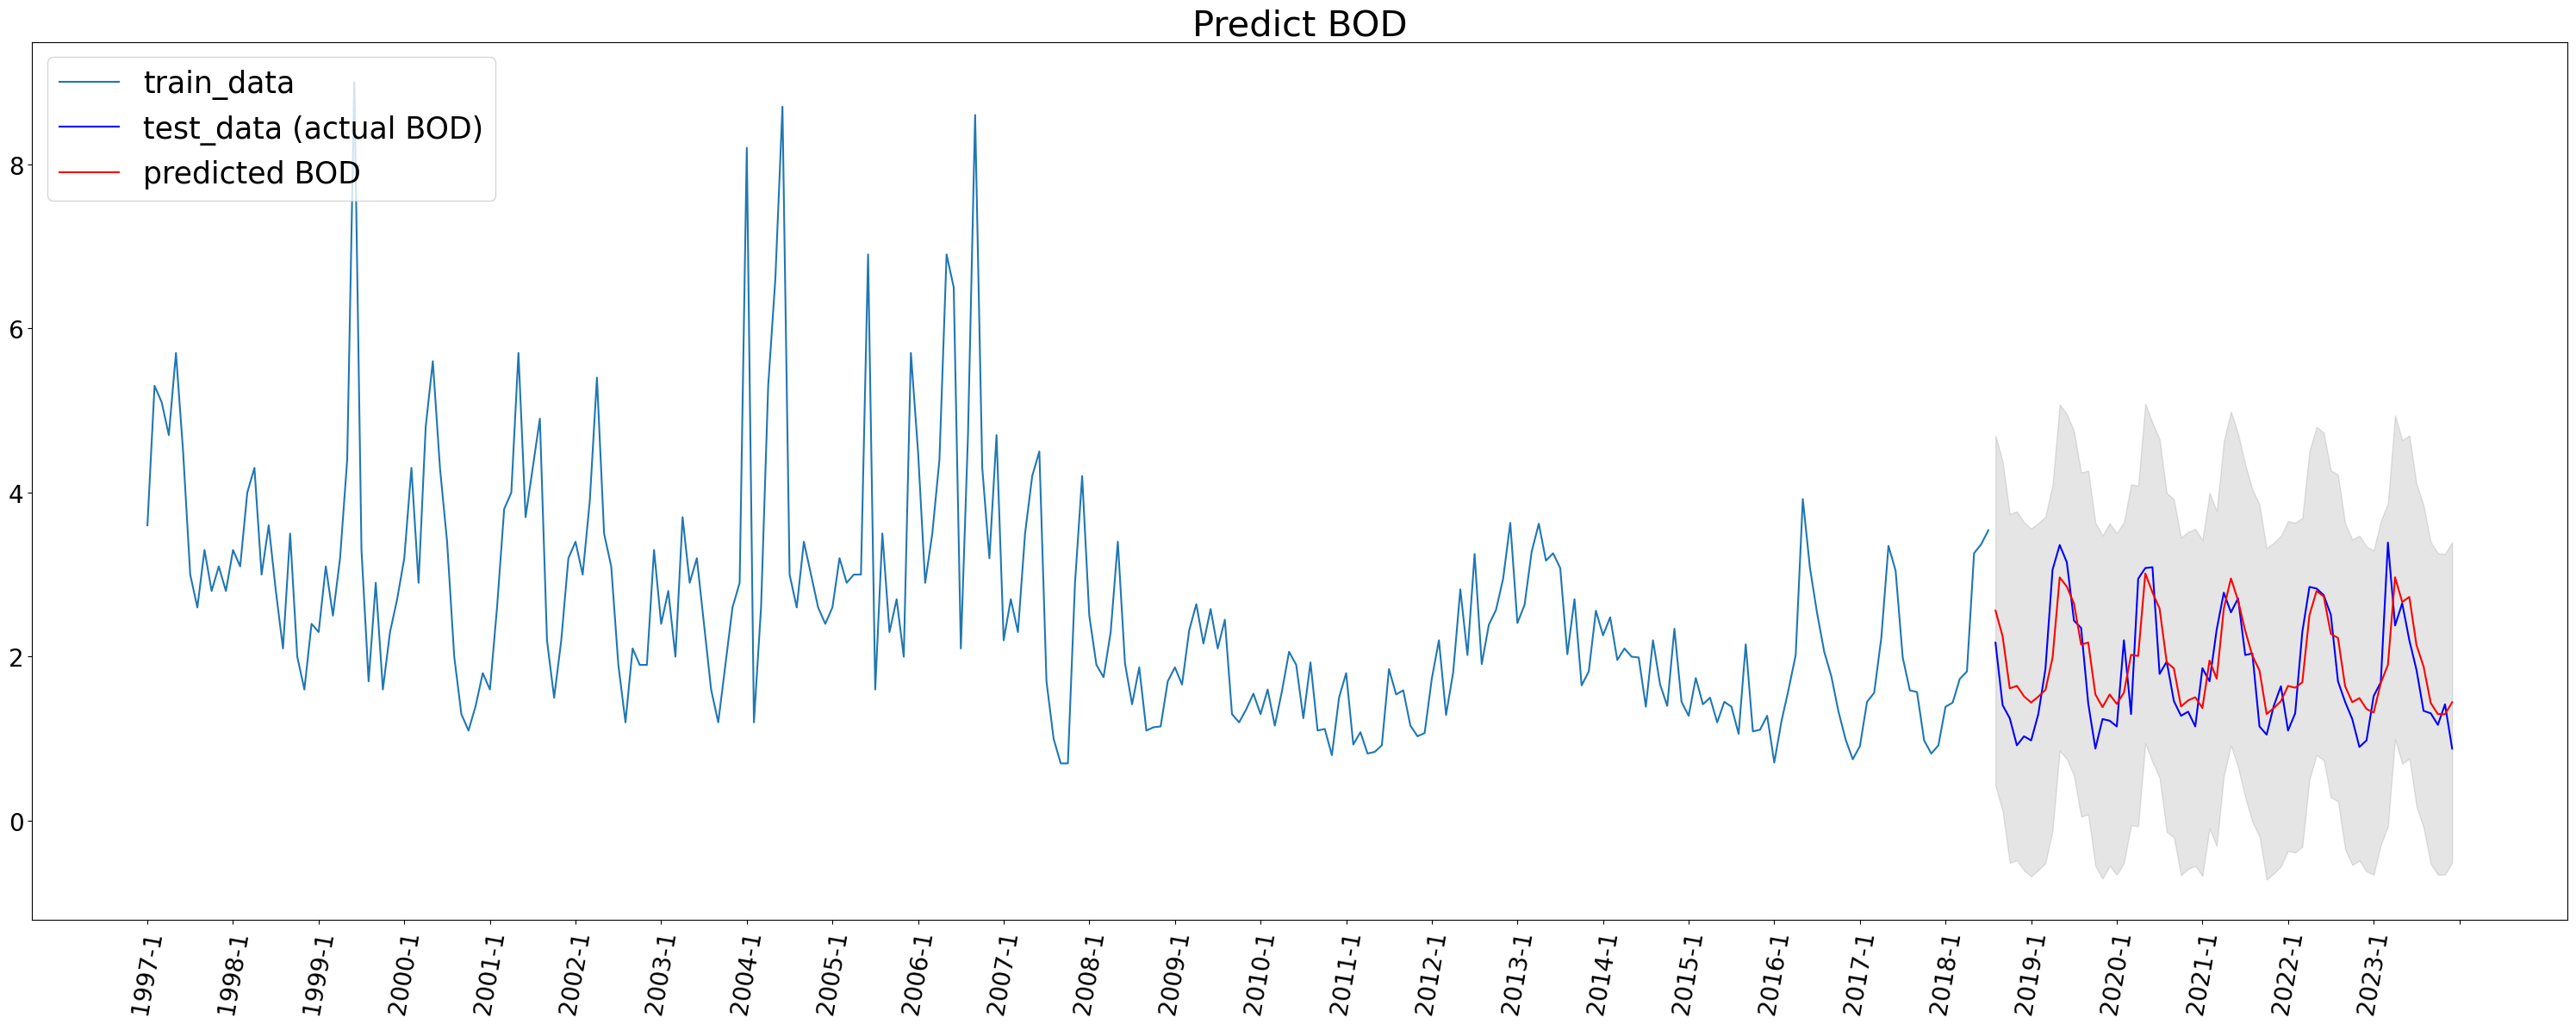

In [46]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from pmdarima.arima import ndiffs
import pmdarima as pm

# 데이터를 분리

data_BOD = df_ts['BOD']
data_TP = df_ts['T-P']

n_diffs_BOD = ndiffs(data_BOD, alpha=0.05, test='adf', max_d=6)
n_diffs_TP = ndiffs(data_TP, alpha=0.05, test='adf', max_d=6)

# train : test = 8 : 2
train_data_BOD, test_data_BOD = df_ts["BOD"][:int(len(df_ts)*0.8)], df_ts["BOD"][int(len(df_ts)*0.8):]
train_data_TP, test_data_TP = df_ts["T-P"][:int(len(df_ts)*0.8)], df_ts["T-P"][int(len(df_ts)*0.8):]

model_fit_BOD = pm.auto_arima(
    	    y=train_data_BOD, 
 	        d=n_diffs_BOD , 
            start_p=0, max_p=3, 
            start_q=0, max_q=3, 
            m=12, seasonal=True,
            stepwise=True,
            trace=True
)

# forecast 함수
def forecast_n_step(model, n=1):
    fc, conf_int = model.predict(n_periods=n, return_conf_int=True)
    # print("fc", fc,"conf_int", conf_int)
    return (
        fc.tolist()[0:n], np.asarray(conf_int).tolist()[0:n]
   )
    
def forecast(len, model, index, data=None):
    y_pred = []
    pred_upper = []
    pred_lower = []

    if data is not None:
        for new_ob in data:
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(new_ob)
    else:
        for i in range(len):
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(fc[0])
    return pd.Series(y_pred, index=index), pred_upper, pred_lower

# Forecast
fc_BOD, upper_BOD, lower_BOD = forecast(len(test_data_BOD), model_fit_BOD, test_data_BOD.index, data = test_data_BOD)

# fc # 예측결과
# pandas series 생성
fc_series_BOD = pd.Series(fc_BOD, index=test_data_BOD.index)
lower_series_BOD = pd.Series(lower_BOD, index=test_data_BOD.index)
upper_series_BOD = pd.Series(upper_BOD, index=test_data_BOD.index)


# Plot
plt.figure(figsize=(30,12))

total_len = len(train_data_BOD)+len(test_data_BOD)

plt.plot(train_data_BOD, label='train_data')
plt.plot(test_data_BOD, c='b', label='test_data (actual BOD)')
plt.plot(fc_BOD, c='r',label='predicted BOD')
plt.fill_between(lower_series_BOD.index, lower_series_BOD, upper_series_BOD, color='k', alpha=.10)
plt.legend(loc='upper left', fontsize=25)
plt.xticks(rotation=80)
plt.xticks(np.arange(0, total_len +1, 12), fontsize=20)
plt.yticks(fontsize=20)
plt.title("Predict BOD", fontsize=30)

plt.tight_layout()
plt.show()


# VAR modeling

In [47]:
df_ts

,BOD,T-P
time,,
1997-1,3.60,0.07
1997-2,5.30,0.23
1997-3,5.10,0.18
1997-4,4.70,0.08
1997-5,5.70,0.05
...,...,...
2023-9,1.34,0.07
2023-10,1.31,0.06
2023-11,1.17,0.08


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.api import VAR

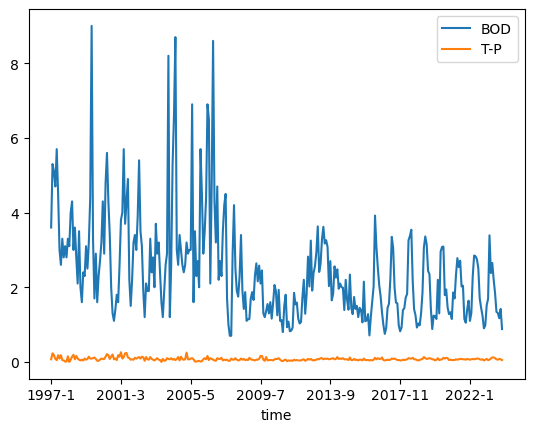

In [49]:
df_ts.plot()
plt.show()

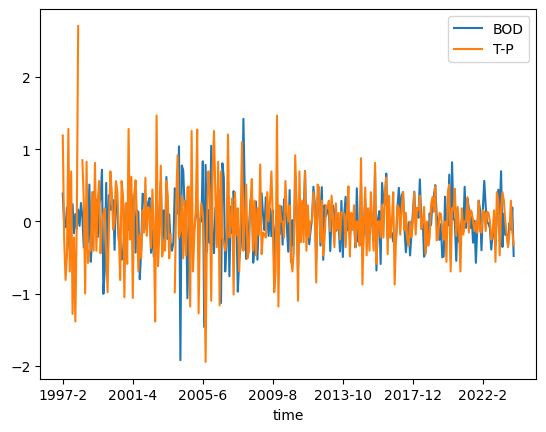

In [50]:
diff_data = np.log(df_ts).diff().dropna()
diff_data.plot()
plt.show()

In [51]:
X_train= df_ts[:int(len(df_ts)*0.8)]
X_test = df_ts[int(len(df_ts)*0.8):]

print(train_data.shape, test_data.shape)

NameError: name 'train_data' is not defined

In [52]:
model_var = VAR(endog=X_train)

var_fit = model_var.fit(maxlags=3, ic='aic')

var_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 26, May, 2024
Time:                     23:05:11
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -5.93455
Nobs:                     256.000    HQIC:                  -6.05045
Log likelihood:           71.9424    FPE:                 0.00218006
AIC:                     -6.12843    Det(Omega_mle):      0.00206556
--------------------------------------------------------------------
Results for equation BOD
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          0.886638         0.213051            4.162           0.000
L1.BOD         0.476168         0.063264            7.527           0.000
L1.T-P         2.757026         1.922176            1.434           0.151
L2.BOD         0

In [53]:
# lag order 값 산출 (적분차수)
var_lag_order = var_fit.k_ar

var_fit.forecast(X_train.values[-var_lag_order:], steps=len(X_test))

array([[3.12679776, 0.08742569],
       [2.96704073, 0.08514528],
       [2.89901402, 0.08289874],
       [2.80471811, 0.08128517],
       [2.73650765, 0.08003488],
       [2.69415467, 0.0789563 ],
       [2.65997523, 0.07814454],
       [2.6337823 , 0.0775342 ],
       [2.61540509, 0.07705743],
       [2.60182866, 0.07669733],
       [2.5916844 , 0.0764286 ],
       [2.58432741, 0.07622636],
       [2.57896389, 0.07607533],
       [2.57502361, 0.07596338],
       [2.5721518 , 0.0758804 ],
       [2.57006254, 0.07581905],
       [2.56853914, 0.07577387],
       [2.56743049, 0.07574064],
       [2.56662501, 0.07571624],
       [2.5660397 , 0.07569837],
       [2.56561465, 0.07568529],
       [2.56530627, 0.07567573],
       [2.56508261, 0.07566875],
       [2.56492047, 0.07566367],
       [2.56480298, 0.07565996],
       [2.56471788, 0.07565727],
       [2.56465627, 0.07565531],
       [2.56461167, 0.07565388],
       [2.5645794 , 0.07565285],
       [2.56455605, 0.0756521 ],
       [2.

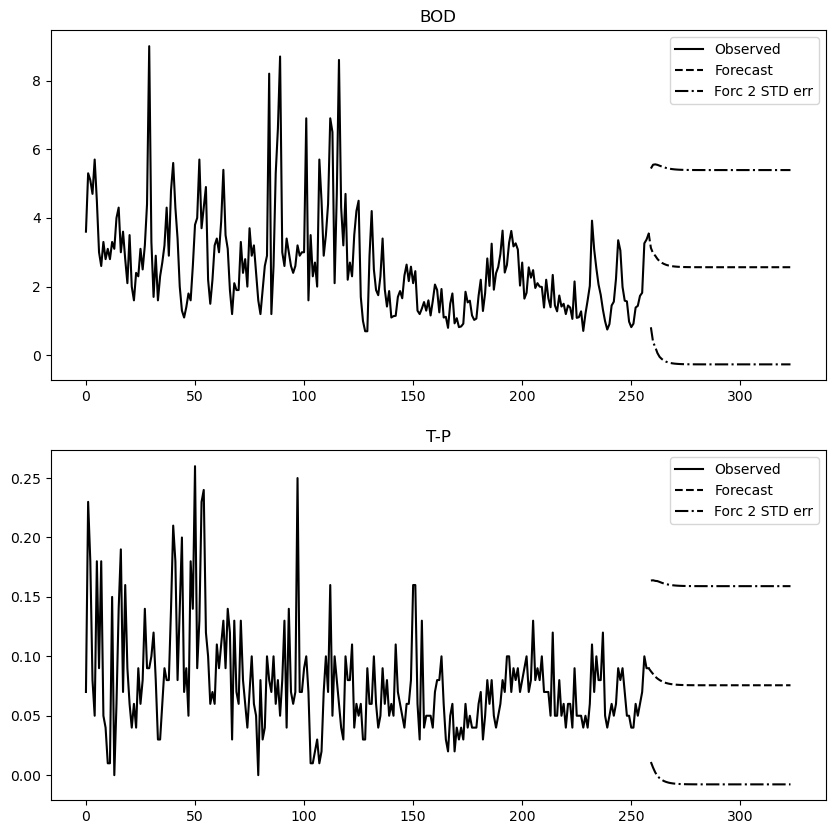

In [54]:
var_fit.plot_forecast(steps=len(X_test))
plt.show()

# Prophet

In [47]:
df_pf = df_ts.reset_index()
df_pf = df_pf[['time', 'BOD']]
df_pf = df_pf.rename(columns={'time':'ds', 'BOD':'y'})
df_pf

,ds,y
0,1997-1,3.60
1,1997-2,5.30
2,1997-3,5.10
3,1997-4,4.70
4,1997-5,5.70
...,...,...
319,2023-9,1.34
320,2023-10,1.31
321,2023-11,1.17
322,2023-12,1.42


23:34:24 - cmdstanpy - INFO - Chain [1] start processing
23:34:24 - cmdstanpy - INFO - Chain [1] done processing


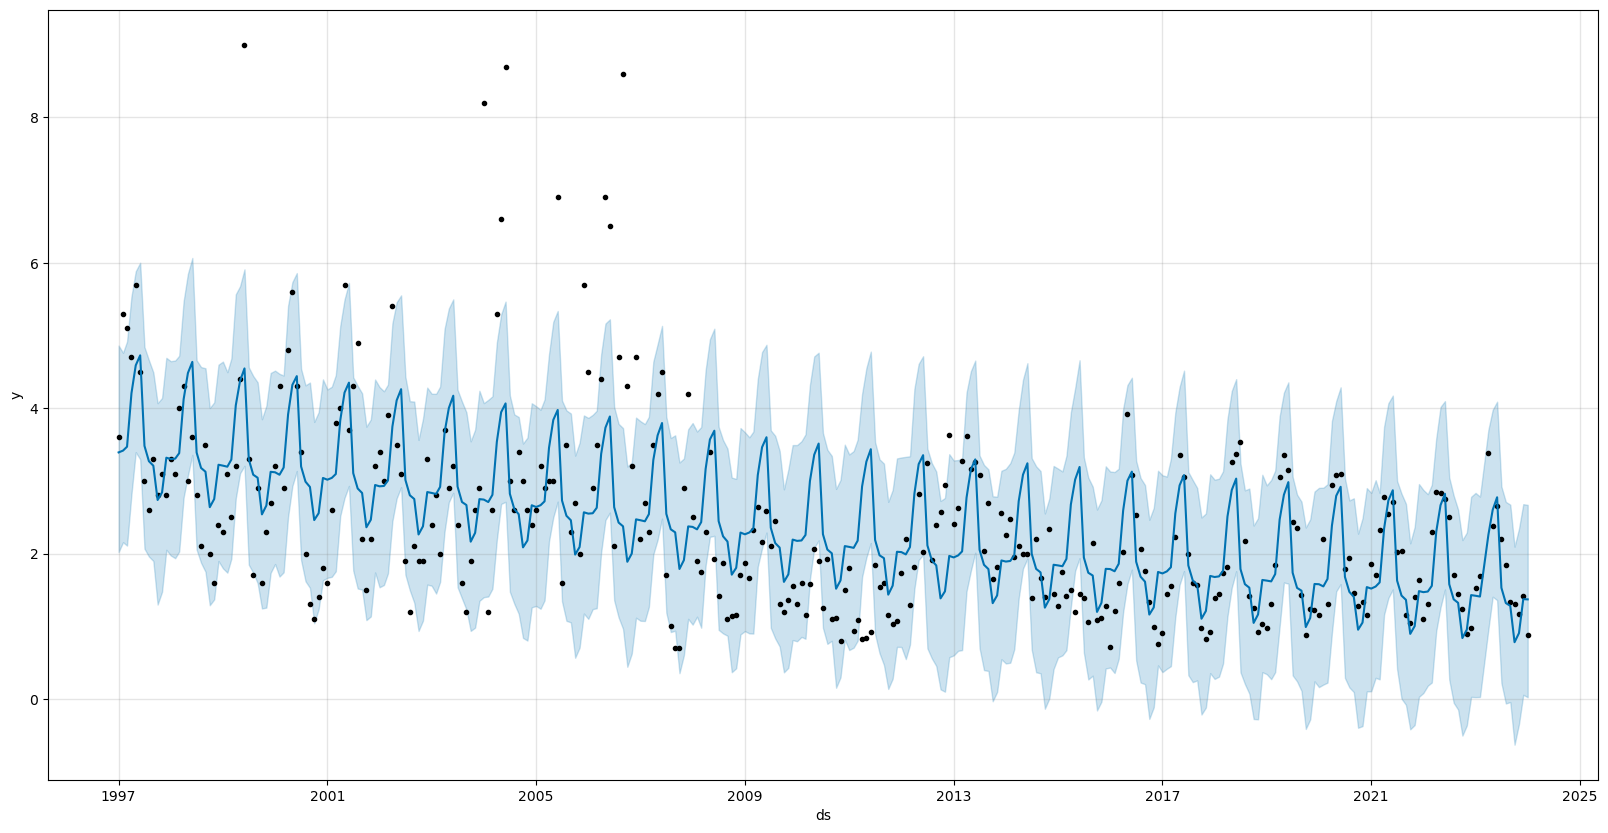

In [48]:
from prophet import Prophet
import matplotlib.pyplot as plt

# 데이터 준비
df_pf = df_ts.reset_index()
df_pf = df_pf[['time', 'BOD']]
df_pf = df_pf.rename(columns={'time':'ds', 'BOD':'y'})

# 새로운 Prophet 객체 생성 및 피팅
prophet = Prophet()
prophet.fit(df_pf)

# 결과 확인
forecast = prophet.predict(df_pf)

# 그래프 그리기
fig, ax = plt.subplots(figsize=(20, 10))
prophet.plot(forecast, ax=ax)
plt.show()

# 검은점은 실측치, 하늘색 선은 예측치, 하늘색 영역은 신뢰구간

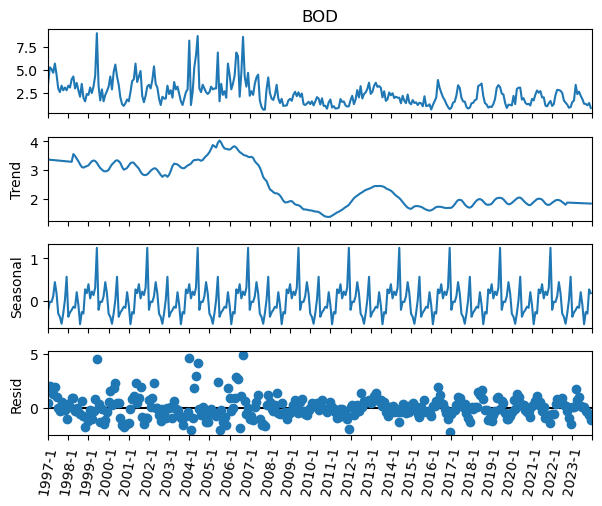

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

# period = n : 계절적 성분 가정을 위한 일수 지정 
# extrapolate_trend='freq' : Trend 성분을 만들기 위한 rolling window 때문에 필연적으로 trend, resid에는 Nan 값이 발생하기 때문에, 이 NaN값을 채워주는 옵션이다.
result = seasonal_decompose(df_ts['BOD'], model='additive', two_sided=True, 
                            period=30, extrapolate_trend='freq') 

total_len = len(df_ts['BOD'])

result.plot()
plt.xticks(rotation=80)
plt.xticks(np.arange(0, total_len +1, 12))
plt.show()

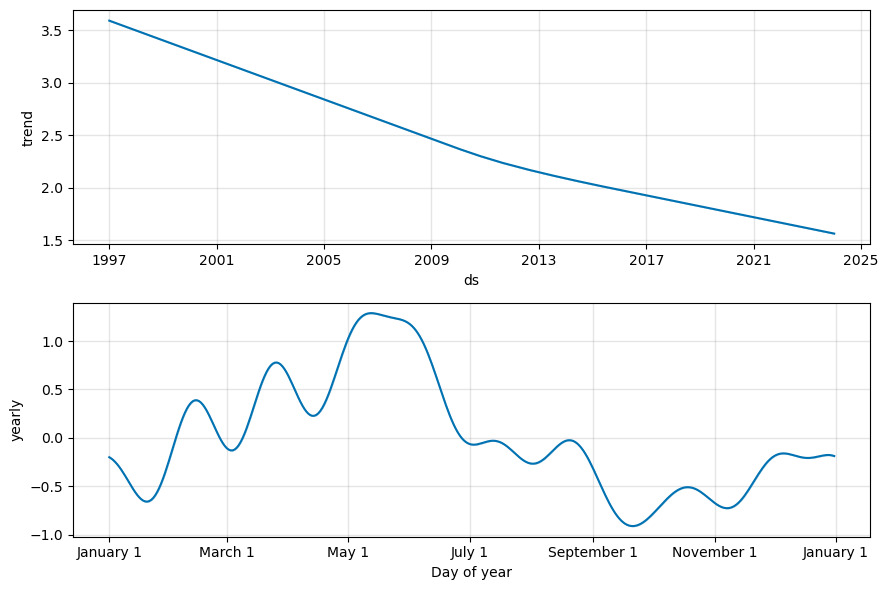

In [50]:
prophet.plot_components(forecast)
plt.show()

<Axes: xlabel='time'>

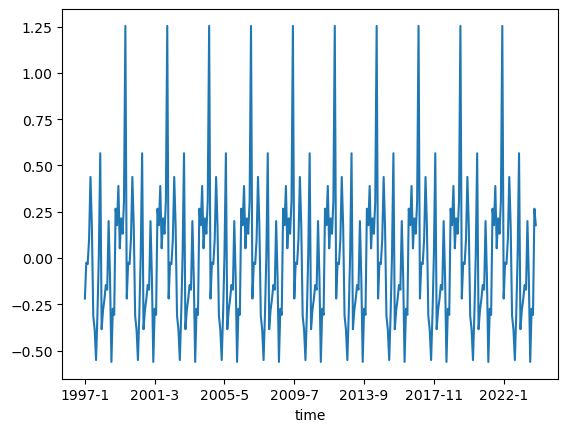

In [65]:
# 👀 계절 성분 확인 

result.seasonal[:].plot()

In [81]:
result

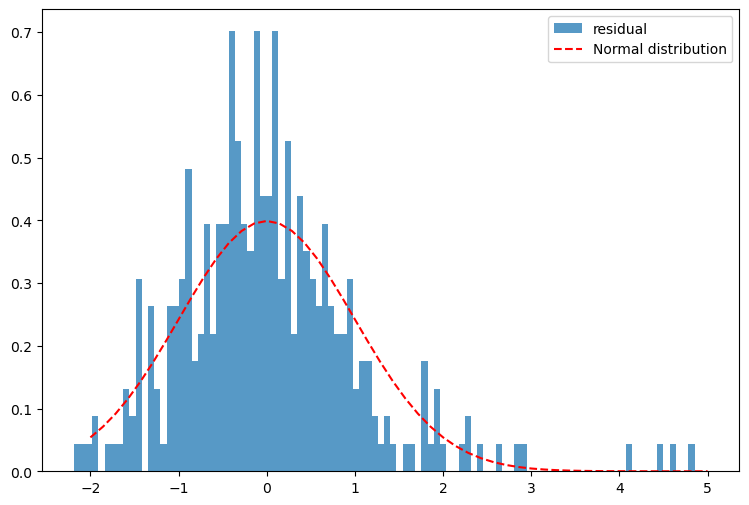

In [76]:
# 잔차 분포 확인
fig, ax = plt.subplots(figsize=(9,6))
_ = plt.hist(result.resid, 100, density=True, alpha=0.75, label='residual')

from scipy.stats import norm
x = np.linspace(-2,5)
y = norm.pdf(x,0,1)
plt.plot(x,y,'r--', label='Normal distribution')

plt.legend()
plt.show()
# 정규분포를 따르고 있음(약간의 skewness 존재)

In [53]:
mu, std = result.resid.mean(), result.resid.std()

print("이상치 갯수:", len(result.resid[(result.resid>mu+3*std)|(result.resid<mu-3*std)]))

이상치 갯수: 4


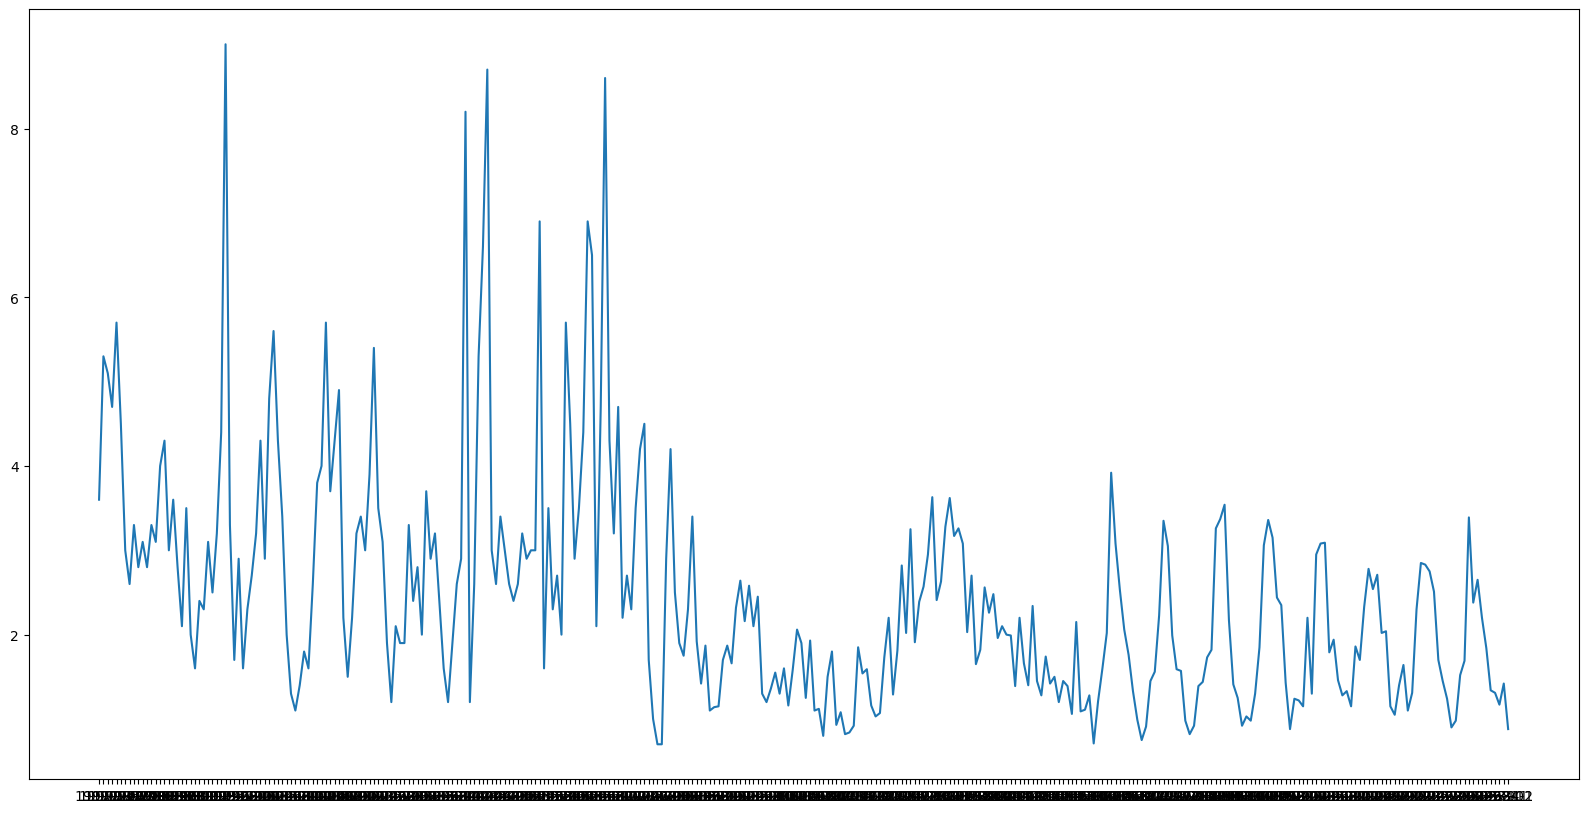

In [54]:
prophet = Prophet()

plt.figure(figsize=(20,10))
plt.plot('BOD', data=df_ts)

plt.show()

In [55]:
prophet = Prophet(changepoint_range=0.8)

In [56]:
prophet = Prophet(changepoint_prior_scale=0.05)

In [57]:
df_pf

,ds,y
0,1997-1,3.60
1,1997-2,5.30
2,1997-3,5.10
3,1997-4,4.70
4,1997-5,5.70
...,...,...
319,2023-9,1.34
320,2023-10,1.31
321,2023-11,1.17
322,2023-12,1.42


23:35:19 - cmdstanpy - INFO - Chain [1] start processing
23:35:19 - cmdstanpy - INFO - Chain [1] done processing


NameError: name 'y' is not defined

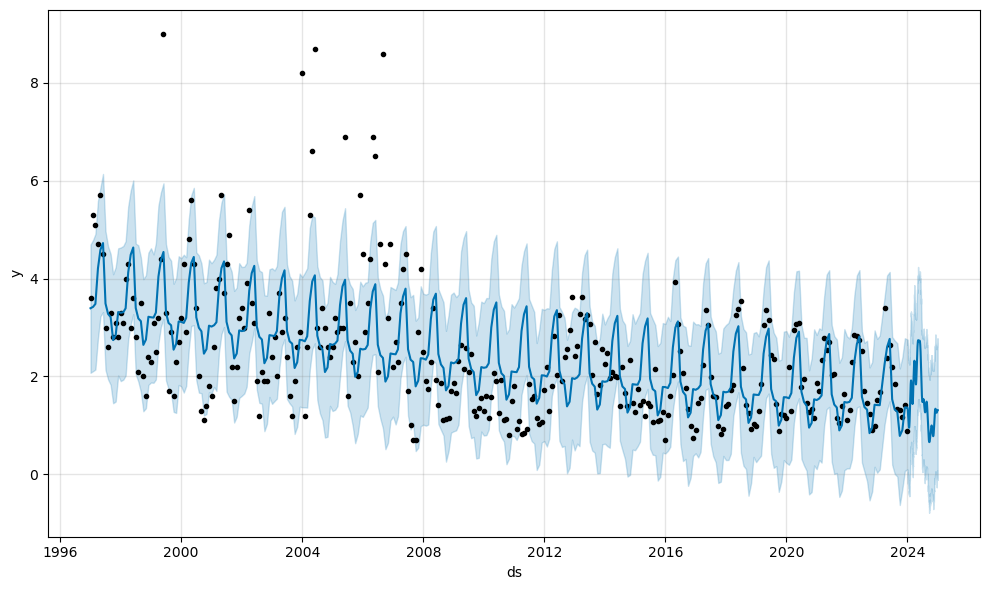

In [64]:
m = Prophet(daily_seasonality = True) 
m.fit(df_pf) # 훈련 
future = m.make_future_dataframe(periods=365)
pred = m.predict(future) # 예측

m.plot(pred) # 시각화 


# ⭐ 이상치 검출 

andf = pred[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']]
andf['y'] = y # y는 실제 시계열 리스트

andf['anomaly'] = 0  # anomaly 감지 태그 컬럼 생성
andf.loc[andf['y'] > andf['yhat_upper'], 'anomaly'] = 1  
 ## 관측치가 최대치보다 큰경우 
andf.loc[andf['y'] < andf['yhat_lower'], 'anomaly'] = -1
 ## 관측치가 최소치보다 작은경우

In [59]:
andf['importance'] = 0  # 이상치 중요도 컬럼 추가
andf.loc[andf['anomaly'] == 1, 'importance'] = (andf['y'] - andf['yhat_upper']) / andf['y']
andf.loc[andf['anomaly'] == -1, 'importance'] = (andf['yhat_lower'] - andf['y']) / andf['y']
andf['score'] = andf['anomaly'] * andf['importance']

KeyError: 'y'

In [ ]:
df_pf

In [60]:
#train test split
cutoff = "2022-01" #데이터 분할 기준
train = df_pf[df_pf['ds']<cutoff]
test = df_pf[df_pf['ds']>=cutoff]

In [61]:
col_lst=train.columns
col_lst=col_lst.drop(['ds','y'])
col_lst=list(col_lst)
col_lst

[]

ValueError: Could not interpret input 'year'

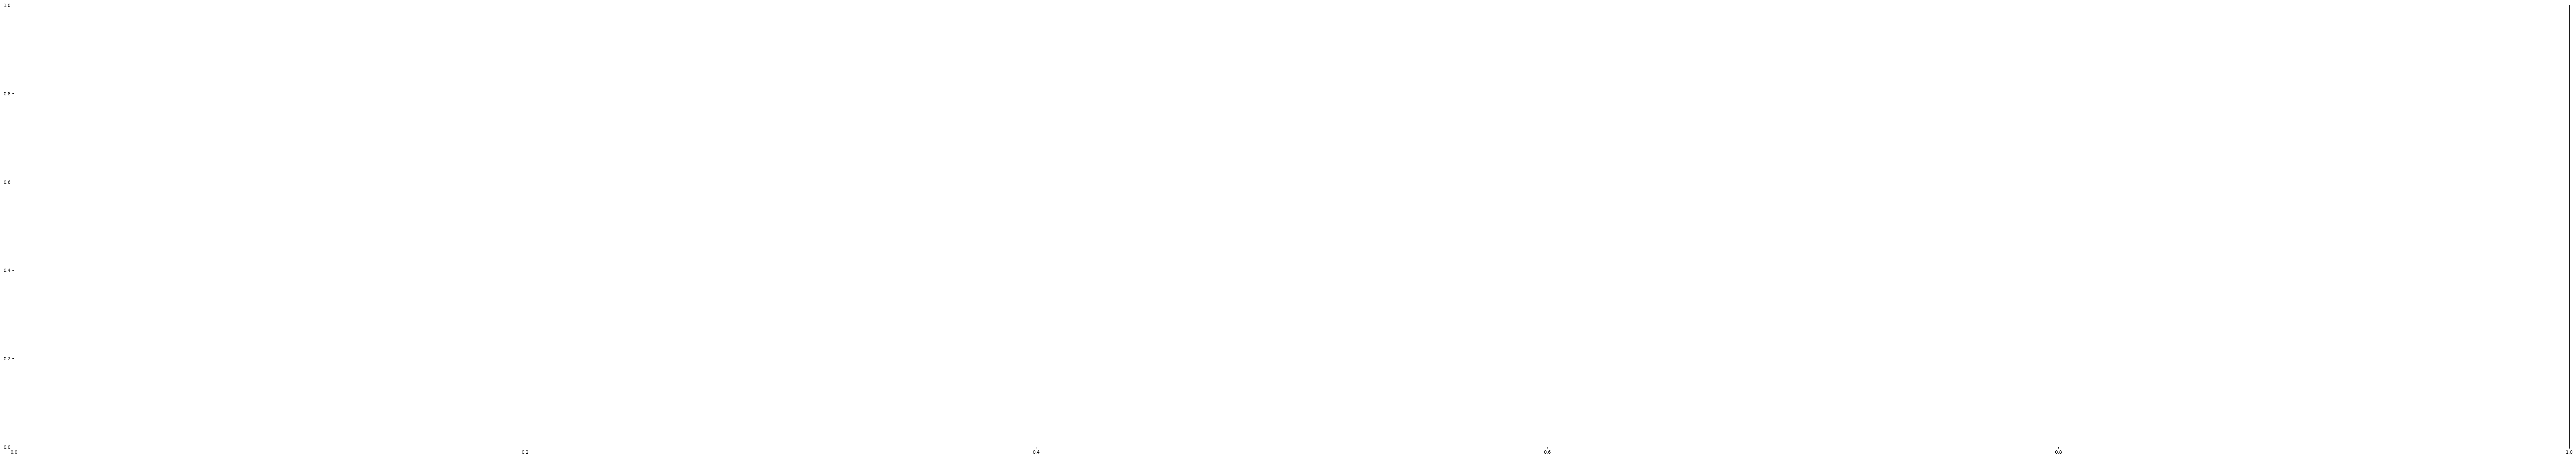

In [62]:
# Barplot

plt.figure(figsize = (100, 80)) # 전체 figure 크기

plt.subplot(4, 1, 1)
sns.barplot(data=df_ts, x='year', y = 'BOD')
plt.yticks(fontsize = 50)
plt.xticks(fontsize=50)
plt.title('BOD per years', fontsize=60)

plt.subplot(4,1,2)
sns.barplot(data=df_ts, x='year', y = 'BOD',hue='month')
plt.yticks(fontsize = 50) # y축 눈금
plt.xticks(fontsize=50)
plt.title("BOD per years and months", fontsize=60)

plt.subplot(4,1,3)
sns.barplot(data=df_ts, x='month', y = 'BOD')
plt.yticks(fontsize = 50) # y축 눈금
plt.xticks(fontsize=50)
plt.title("BOD per months", fontsize=60)

plt.subplot(4,1,4)
sns.barplot(data=df_ts, x='month', y = 'BOD',hue='year')
plt.yticks(fontsize = 50) # y축 눈금
plt.xticks(fontsize=50)
plt.title("BOD per months and years", fontsize=60)

ValueError: Could not interpret value `year` for parameter `x`

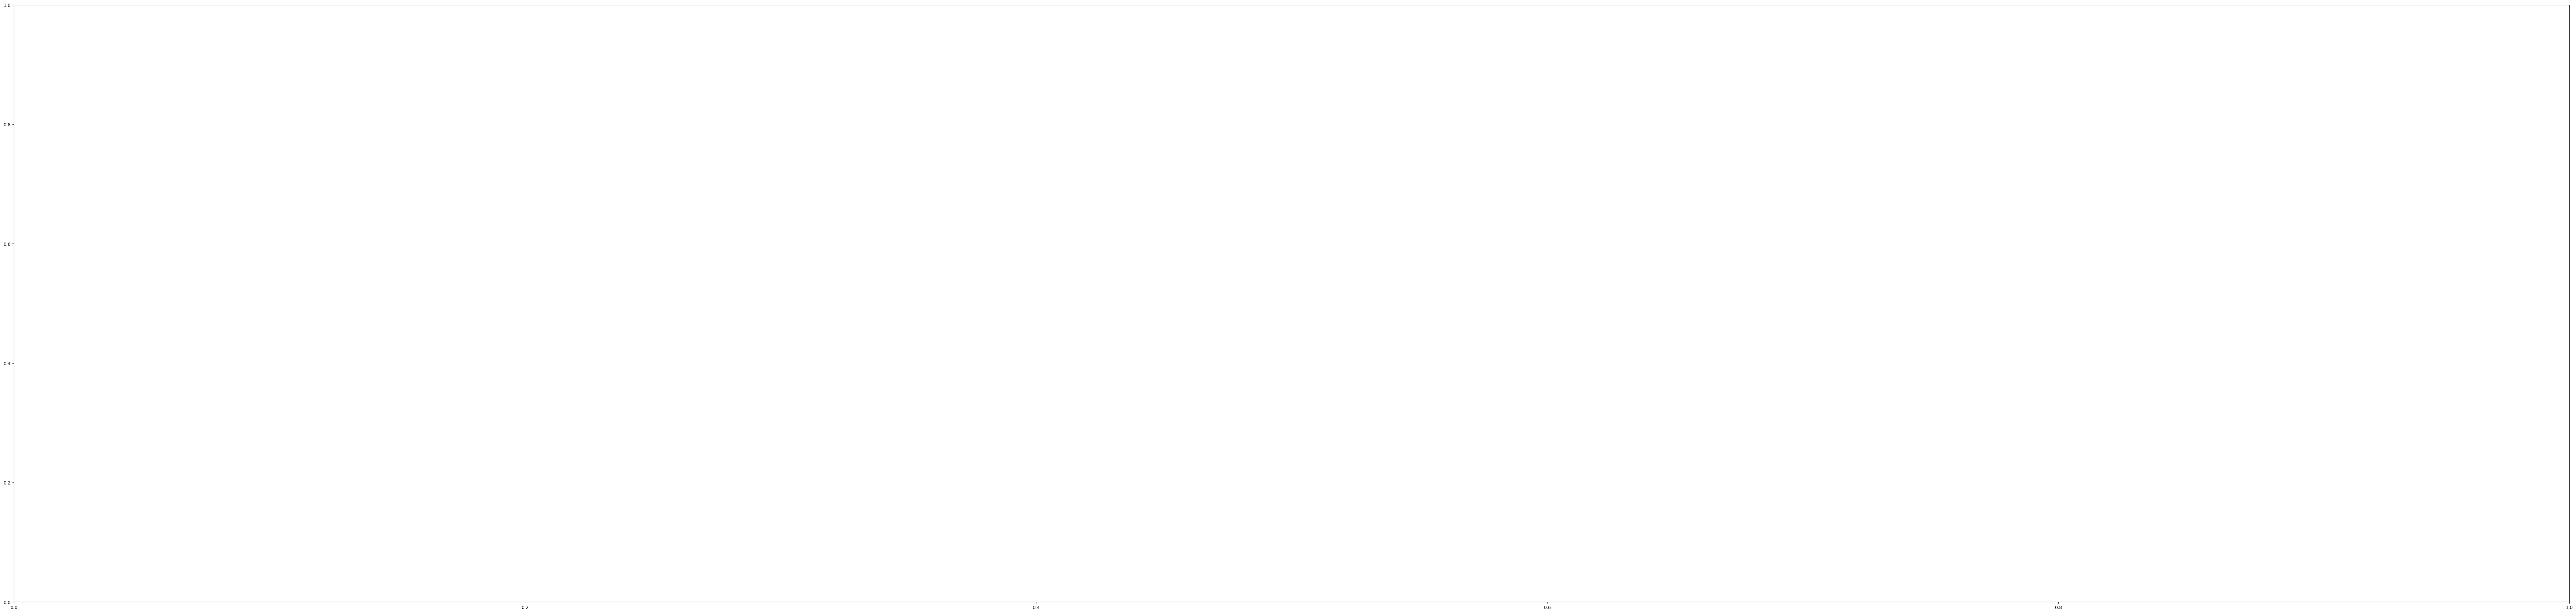

In [77]:
# Line plot

plt.figure(figsize=(100,80))

plt.subplot(3,1,1)
sns.lineplot(data=df_ts, x='year', y = 'BOD')
plt.yticks(fontsize = 60) # y축 눈금
plt.xticks(fontsize=60)
plt.title("BOD trend", fontsize=70)

plt.subplot(3,1,2)
# 연도별 월 데이터
sns.lineplot(data=df_ts, x='year', y = 'BOD',hue='month')
plt.yticks(fontsize = 60) # y축 눈금
plt.xticks(fontsize=60)
plt.title("year date per months", fontsize=70)

plt.subplot(3,1,3)
# 월별 시각화
sns.lineplot(data=df_ts, x='month', y = 'BOD',hue='year')
plt.yticks(fontsize = 60) # y축 눈금
plt.xticks(fontsize=60)
plt.title("month data per years", fontsize=70)

In [ ]:
df_clear.to_csv("clear_data.csv", index=False)

In [ ]:
df_ts.to_csv("ts_data.csv", index=False)